In [26]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
pyproj.datadir.set_data_dir('/Users/libbykoolik/opt/anaconda3/envs/isrm_calcs_env/share/proj')

In [3]:
oehha_0308_fp = '/Users/libbykoolik/Downloads/drive-download-20230222T223623Z-001/stk12_FULL_0308.shp'
oehha_0308 = gpd.read_file(oehha_0308_fp)

In [4]:
oehha_0308.head()

,arbd_fc,ARBID,fcd2012,fcd2017,facdthr,arb__12,RECODE,DIS,AB,CO,...,VOC,NH3,Lt_WGS84,Ln_WGS84,DUP,cnt_ARB,TON,NA_val2,LL_SOUR,geometry
0,100001_50001051,100001.0,50001051.0,50001051.0,NaN,100001_50001051,0,MOJ,MD,36.0,...,0.0508,7.0234,35.766,-117.383,0,1.0,0,0,LL,POINT (-1816672.987 -263833.701)
1,100001_50001051,100001.0,50001051.0,50001051.0,NaN,100001_50001051,0,MOJ,MD,36.0,...,0.0000,0.0000,35.766,-117.383,0,1.0,0,0,LL,POINT (-1816672.987 -263833.701)
2,100001_50001051,100001.0,50001051.0,50001051.0,NaN,100001_50001051,0,MOJ,MD,36.0,...,0.0000,0.0000,35.766,-117.383,0,1.0,0,0,LL,POINT (-1816672.987 -263833.701)
3,100001_50001051,100001.0,50001051.0,50001051.0,NaN,100001_50001051,0,MOJ,MD,36.0,...,0.0000,0.0000,35.766,-117.383,0,1.0,0,0,LL,POINT (-1816672.987 -263833.701)
4,100001_50001051,100001.0,50001051.0,50001051.0,NaN,100001_50001051,0,MOJ,MD,36.0,...,0.0000,0.0000,35.766,-117.383,0,1.0,0,0,LL,POINT (-1816672.987 -263833.701)


In [5]:
oehha_0308.columns

Index(['arbd_fc', 'ARBID', 'fcd2012', 'fcd2017', 'facdthr', 'arb__12',
       'RECODE', 'DIS', 'AB', 'CO', 'FAC_I2C', 'STK', 'STKNAME', 'STKHT',
       'STKDIAM', 'GT', 'GF', 'GV', 'COORD_S', 'DATUM', 'SPHEROI', 'X_USERC',
       'Y_USERC', 'SLAT_NA', 'SLON_NA', 'SRCTYP', 'PM2_5', 'NOX', 'SOX', 'VOC',
       'NH3', 'Lt_WGS84', 'Ln_WGS84', 'DUP', 'cnt_ARB', 'TON', 'NA_val2',
       'LL_SOUR', 'geometry'],
      dtype='object')

In [6]:
stack_data_csv_fp = '/Users/libbykoolik/Downloads/stk12_FULL_0308.csv'
stack_data = pd.read_csv(stack_data_csv_fp)

In [8]:
latlon = stack_data[['arbid_facid','Lat_WGS84','Long_WGS84']]

In [9]:
latlon.head()

,arbid_facid,Lat_WGS84,Long_WGS84
0,100001_50001051,35.766,-117.383
1,100001_50001051,35.766,-117.383
2,100001_50001051,35.766,-117.383
3,100001_50001051,35.766,-117.383
4,100001_50001051,35.766,-117.383


In [15]:
geometry = gpd.points_from_xy(y=latlon['Lat_WGS84'], x=latlon['Long_WGS84'])

In [27]:
latlon_gdf = gpd.GeoDataFrame(latlon, geometry=geometry, crs='EPSG:4326')

<AxesSubplot:>

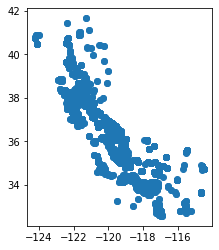

In [28]:
latlon_gdf.plot()

In [18]:
latlon_gdf.head()

,arbid_facid,Lat_WGS84,Long_WGS84,geometry
0,100001_50001051,35.766,-117.383,POINT (-117.38300 35.76600)
1,100001_50001051,35.766,-117.383,POINT (-117.38300 35.76600)
2,100001_50001051,35.766,-117.383,POINT (-117.38300 35.76600)
3,100001_50001051,35.766,-117.383,POINT (-117.38300 35.76600)
4,100001_50001051,35.766,-117.383,POINT (-117.38300 35.76600)


In [19]:
oehha_0308.crs

<Derived Projected CRS: PROJCS["Lambert_Conformal_Conic",GEOGCS["GCS_unnam ...>
Name: Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: D_unknown
- Ellipsoid: Unknown
- Prime Meridian: Greenwich

In [29]:
oehha_0308.crs == latlon_gdf.crs

False

In [30]:
oehha_0308_WGS = oehha_0308.to_crs(latlon_gdf.crs)

(38.0, 40.0)

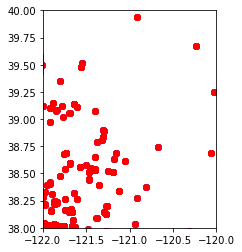

In [32]:
fig, ax = plt.subplots()
oehha_0308_WGS.plot(ax=ax, facecolor='blue')
latlon_gdf.plot(ax=ax, facecolor='red')
ax.set_xlim([-122,-120])
ax.set_ylim([38,40])

(38.0, 40.0)

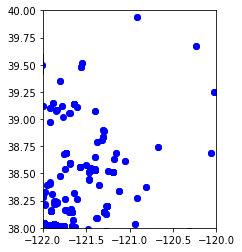

In [33]:
fig, ax = plt.subplots()
oehha_0308_WGS.plot(ax=ax, facecolor='blue')
ax.set_xlim([-122,-120])
ax.set_ylim([38,40])

In [34]:
latlon_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich